In [16]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


path = './data/'

def boxplot_emotions(df: pd.DataFrame, metric: str, ax) -> None:
    sub_df = df[['Emotion', metric]]
    
    # Ordenar los boxplots en función de la mediana
    grouped = sub_df.loc[:, ['Emotion', metric]].groupby(['Emotion']).median().sort_values(metric)
    
    sns.boxplot(sub_df, x='Emotion', y=metric, ax=ax, order=grouped.index)
    ax.set_xlabel('')

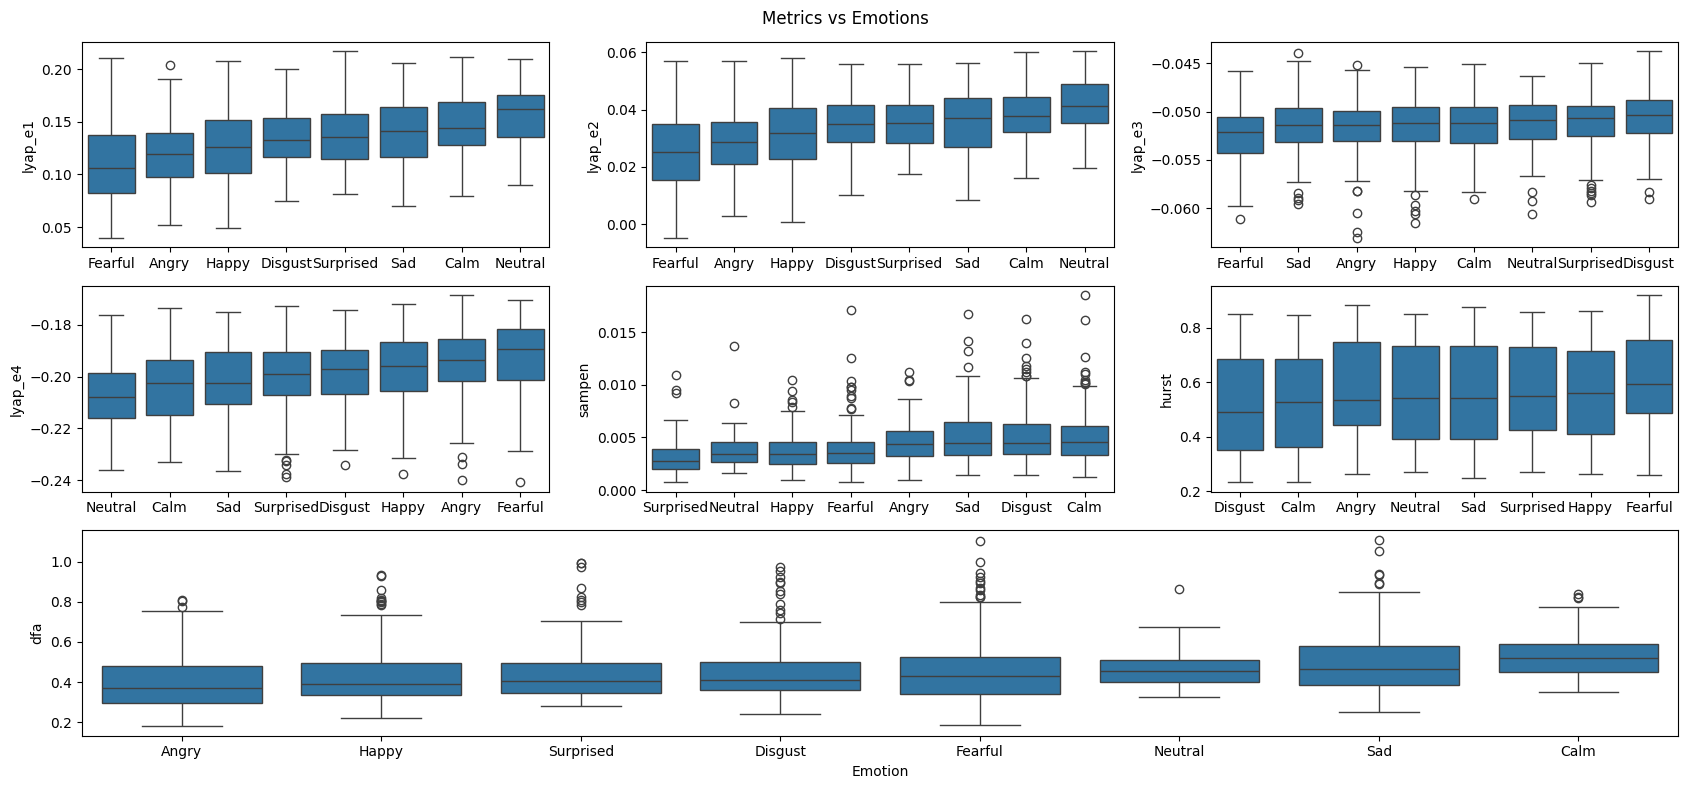

In [17]:
resampled_df = pd.read_csv(os.path.join(path, 'resampled.csv'), delimiter=';', index_col=0)
metrics_label = resampled_df.drop('Emotion', axis=1).columns

fig, axes = plt.subplots(3, 3, figsize=(17, 8))

# Combinar los dos últimos `axis`, puesto que son 7 métricas POR EL MOMENTO
# aún faltan el `corr_dim` y `lyap_r`. Entonces serían 9 métricas en total
gs = axes[2, 0].get_gridspec()
for ax in axes[2, :]:
    ax.remove()

# Unir la última fila en una sola. SOLO TEMPORALMENTE hasta que estén las
# otras dos métricas restantes
axbig = fig.add_subplot(gs[2, :])

# Hacer todas las gráficas excepto la última. Se combinarán los dos `axis`
i = 0
for sub_ax in axes:
    for ax in sub_ax:
        if i == 6:  # Última iteración
            boxplot_emotions(resampled_df, metrics_label[i], axbig)
            axbig.set_xlabel('Emotion')
            break
        boxplot_emotions(resampled_df, metrics_label[i], ax)
        i += 1


fig.suptitle('Metrics vs Emotions')
fig.tight_layout()
plt.show()